In [1]:
C1 = C2 = D1 = D2 = 1.0
u0 = v0 = 0.7
Δt = 0.05

0.05

In [2]:
function euler(u,v)
  u_new = (1 + Δt * (  D1 - C1*v ) ) * u
  v_new = (1 + Δt * ( -D2 + C2*u ) ) * v
  return u_new, v_new
end

euler (generic function with 1 method)

In [3]:
lastT = 25   # 計算を終える時間(おおよそ)を設定．
Δt = 0.01    # Δt をさっきの 1/5 と，小さめに設定し直す．
N = round(Int, lastT/Δt)   # 最終時間ステップは整数に．

# 計算ステップ数を N に直し，あとは前と同様に．
u,v = u0, v0
uv_sq = [ u0 v0 ]

for i in 1:N
    u,v = euler(u,v)
    uv_sq = vcat(uv_sq, [ u v ])
end

In [4]:
using Plots

default( legend = :outertopright, xlabel = "time t", ylabel = "number" )

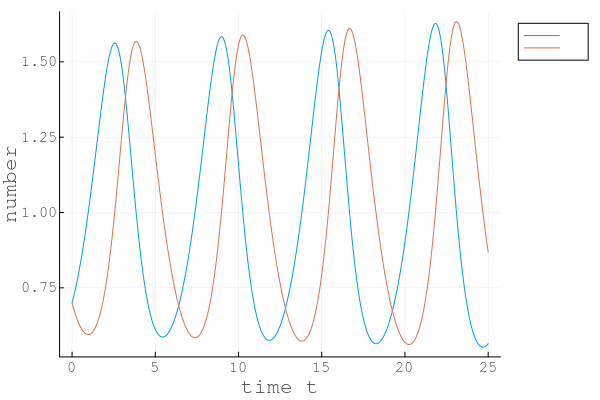

GKS: could not find font Meiryo.ttf
GKS: glyph missing from current font: 39770
GKS: glyph missing from current font: 128031
GKS: invalid bitmap size
GKS: glyph missing from current font: 39851
GKS: glyph missing from current font: 129416
GKS: invalid bitmap size


In [5]:
t_sq = Δt * [0:N]
plot(t_sq, uv_sq, label = ["魚 🐟" "鮫 🦈"], fontfamily="Meiryo" )

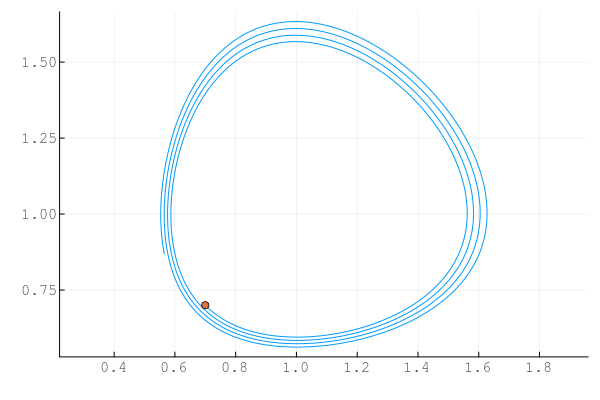

GKS: glyph missing from current font: 39770
GKS: glyph missing from current font: 128031
GKS: invalid bitmap size
GKS: glyph missing from current font: 39851
GKS: glyph missing from current font: 129416
GKS: invalid bitmap size
GKS: glyph missing from current font: 21021
GKS: glyph missing from current font: 26399
GKS: glyph missing from current font: 20516
GKS: invalid bitmap size


In [6]:
u_sq = uv_sq[:,1] # データの 1列目 = 魚の近似値の列．
v_sq = uv_sq[:,2] # データの 2列目 = サメの近似値の列．

plot(u_sq, v_sq)
plot!((u0,v0), marker = :circle, fontfamily="Meiryo",
  aspect_ratio = 1, legend = false,
  xaxis = "魚 🐟", yaxis = "鮫 🦈" )
# aspect_ratio は縦横の軸の比率．

annotate!(u0,v0, ("初期値", :bottom, :left)) # 好きな場所に注釈を書ける

In [7]:
function euler_fishing(u,v,E)
  u_new = (1 + Δt * (  D1 - E - C1*v ) ) * u
  v_new = (1 + Δt * ( -D2 - E + C2*u ) ) * v
  return u_new, v_new
end

euler_fishing (generic function with 1 method)

In [8]:
E = 0.5

lastT = 25
Δt = 0.01
N = round(Int, lastT/Δt)   # 最終時間ステップは整数に．

u,v = u0, v0
uv_f_sq = [ u0 v0 ]

for i in 1:N
    u,v = euler_fishing(u,v,E)
    uv_f_sq = vcat(uv_f_sq, [ u v ])
end

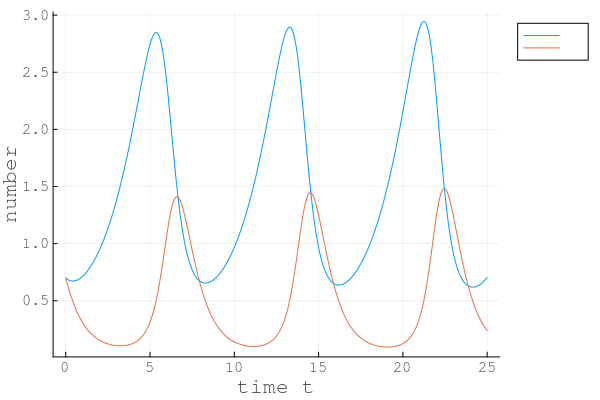

GKS: glyph missing from current font: 39770
GKS: glyph missing from current font: 128031
GKS: invalid bitmap size
GKS: glyph missing from current font: 39851
GKS: glyph missing from current font: 129416
GKS: invalid bitmap size


In [9]:
t_sq = Δt * [0:N]
plot(t_sq, uv_f_sq, label = ["魚 🐟" "鮫 🦈"], fontfamily="Meiryo" )

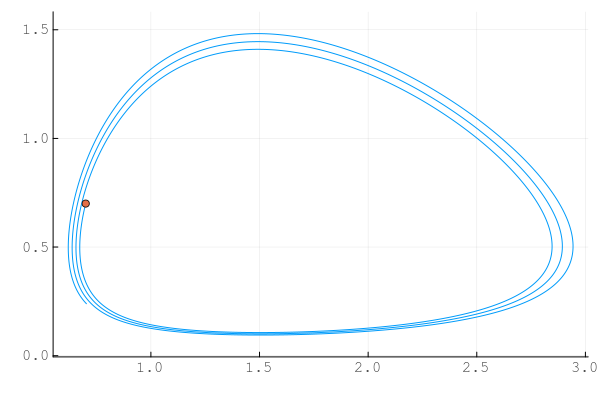

GKS: glyph missing from current font: 39770
GKS: glyph missing from current font: 128031
GKS: invalid bitmap size
GKS: glyph missing from current font: 39851
GKS: glyph missing from current font: 129416
GKS: invalid bitmap size
GKS: glyph missing from current font: 21021
GKS: glyph missing from current font: 26399
GKS: glyph missing from current font: 20516
GKS: invalid bitmap size


In [10]:
u_f_sq = uv_f_sq[:,1]
v_f_sq = uv_f_sq[:,2]

default(aspect_ratio = 1, legend = false,
  xaxis = "魚 🐟", yaxis = "鮫 🦈", fontfamily = "Meiryo" )
# 以降，楽をするためにデフォルト設定してしまえ．

plot(u_f_sq, v_f_sq)
plot!((u0,v0), marker = :circle)
annotate!( u0, v0, ("初期値", :top, :left))

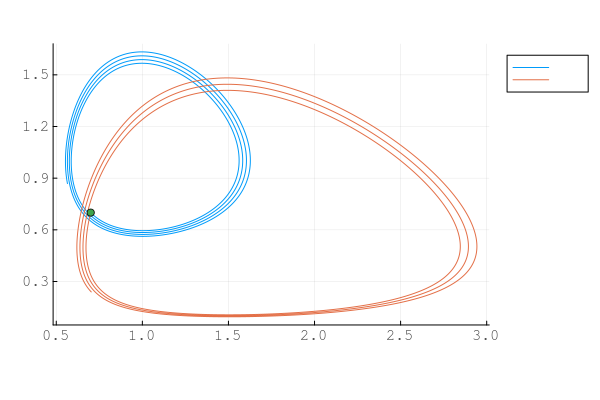

GKS: glyph missing from current font: 39770
GKS: glyph missing from current font: 128031
GKS: invalid bitmap size
GKS: glyph missing from current font: 39851
GKS: glyph missing from current font: 129416
GKS: invalid bitmap size
GKS: glyph missing from current font: 28417
GKS: glyph missing from current font: 26989
GKS: glyph missing from current font: 28961
GKS: glyph missing from current font: 12375
GKS: invalid bitmap size
GKS: glyph missing from current font: 28417
GKS: glyph missing from current font: 26989
GKS: glyph missing from current font: 26377
GKS: glyph missing from current font: 12426
GKS: invalid bitmap size
GKS: glyph missing from current font: 21021
GKS: glyph missing from current font: 26399
GKS: glyph missing from current font: 20516
GKS: invalid bitmap size


In [11]:
default( legend = :outertopright )

# 漁業効果無しのケースをプロットして、
plot(u_sq, v_sq, label = "漁業無し")

# 次に漁業効果有りのケースを描き足して、
plot!(u_f_sq, v_f_sq, label = "漁業有り")

# 初期値も描き足す
plot!((u0,v0), marker = :circle, label = false )
annotate!( u0, v0, ("初期値", :left))

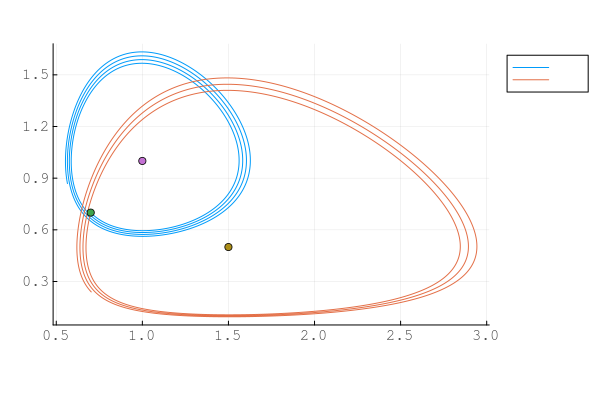

GKS: glyph missing from current font: 39770
GKS: glyph missing from current font: 128031
GKS: invalid bitmap size
GKS: glyph missing from current font: 39851
GKS: glyph missing from current font: 129416
GKS: invalid bitmap size
GKS: glyph missing from current font: 28417
GKS: glyph missing from current font: 26989
GKS: glyph missing from current font: 28961
GKS: glyph missing from current font: 12375
GKS: invalid bitmap size
GKS: glyph missing from current font: 28417
GKS: glyph missing from current font: 26989
GKS: glyph missing from current font: 26377
GKS: glyph missing from current font: 12426
GKS: invalid bitmap size
GKS: glyph missing from current font: 21021
GKS: glyph missing from current font: 26399
GKS: glyph missing from current font: 20516
GKS: invalid bitmap size
GKS: glyph missing from current font: 20013
GKS: glyph missing from current font: 24515
GKS: invalid bitmap size
GKS: glyph missing from current font: 20013
GKS: glyph missing from current font: 24515
GKS: invalid

In [12]:
plot(u_sq, v_sq, label = "漁業無し")

# 次に漁業効果有りのケースを描き足して、
plot!(u_f_sq, v_f_sq, label = "漁業有り")

# 初期値
plot!((u0,v0), marker = :circle, label = false )
annotate!( u0, v0, ("初期値", :left))

# それぞれの軌道中心
plot!((D2/C2,D1/C1), marker = :circle, label = false)
annotate!( D2/C2,D1/C1, ("中心", :left))

plot!(((D2 + E)/C2,(D1 - E)/C1), marker = :circle, label = false )
annotate!( (D2 + E)/C2, (D1 - E)/C1, ("中心", :left))

In [21]:
using Interact

GKS: glyph missing from current font: 39770
GKS: glyph missing from current font: 128031
GKS: invalid bitmap size
GKS: glyph missing from current font: 39851
GKS: glyph missing from current font: 129416
GKS: invalid bitmap size
GKS: glyph missing from current font: 39770
GKS: glyph missing from current font: 128031
GKS: invalid bitmap size
GKS: glyph missing from current font: 39851
GKS: glyph missing from current font: 129416
GKS: invalid bitmap size
GKS: glyph missing from current font: 39770
GKS: glyph missing from current font: 128031
GKS: invalid bitmap size
GKS: glyph missing from current font: 39851
GKS: glyph missing from current font: 129416
GKS: invalid bitmap size
GKS: glyph missing from current font: 39770
GKS: glyph missing from current font: 128031
GKS: invalid bitmap size
GKS: glyph missing from current font: 39851
GKS: glyph missing from current font: 129416
GKS: invalid bitmap size
GKS: glyph missing from current font: 39770
GKS: glyph missing from current font: 128031

Plots.AnimatedGif("C:\\Users\\11325\\AppData\\Local\\Temp\\jl_WlYzE5UVYv.gif")
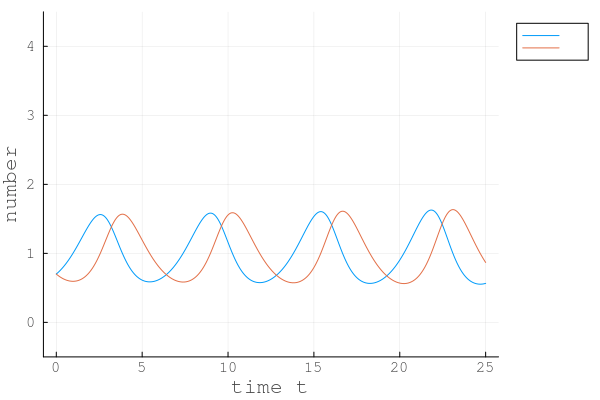

In [24]:
default( ylims = (-0.5, 4.5), aspect_ratio = :none,
   xlabel = "time t", ylabel = "number" )
# グラフの描画範囲を統一することで見やすくする．
# この数字は，教官がさきにおおよそ計算したおいたもの．

@gif for E in 0.0:0.01:0.8

    # ここから end まではこれまでと本質的に同じ．
    u,v = u0, v0
    uv_f_sq = [ u0 v0 ]

    for i in 1:N
        u,v = euler_fishing(u,v,E)
        uv_f_sq = vcat(uv_f_sq, [ u v ])
    end

    plot(t_sq, uv_f_sq, label = ["魚 🐟" "鮫 🦈"], fontfamily="Meiryo" )
end

In [23]:
using WebIO